<a href="https://colab.research.google.com/github/UKashNK/Chicago-Crime-Forecast/blob/main/string_analyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STRING ANALYSIS

Author: Ndugwa Uka.

##Loading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)

In [88]:
url="/content/drive/MyDrive/password_file_e.csv"
#,nrows=3_000_000
imp_df=pd.read_csv(url,sep="\t",encoding_errors="ignore",on_bad_lines="skip",nrows=9_000_000)
imp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 1 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   entries  object
dtypes: object(1)
memory usage: 68.7+ MB


## String Analysis

### Entry statistics

In [89]:
#Data manipulation
df=imp_df
df.head()

,entries
0,philips
1,johana
2,ilove
3,hitman
4,trandafir


In [90]:
#Finding length of entries and sorting the data
df["length"]=df["entries"].str.len()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   entries  object 
 1   length   float64
dtypes: float64(1), object(1)
memory usage: 137.3+ MB


### character filter

In [92]:
#filtering for minmum 8 characters
if df["length"].max()>=8:
  df=df[df["length"]>=8]



In [93]:
#Filtering for max 17 characters
if df["length"].min()<=17:
  df=df[df["length"]<=17]

### Analysing String

In [94]:

def combiner(columns,required_length=2):
  com_ent={}
  for word in columns:
    word=str(word)
    comb_ent={}

     #conting every n syllable combination
     #Finding combinations that contain required letters
    combinations=[]
    required_length=required_length
    starting_index=0
    if required_length>1:
      while starting_index<=len(word)-required_length:
        ending_index= starting_index + required_length
        combinations.append(word[starting_index:ending_index])
        starting_index+=1
      #counting combinations
      for combination in combinations:
        value=combinations.count(combination)
        combination=str(combination)
        comb_ent[combination]=value
    else:
     #counting every character in the entry
      for letter in word:
        value=word.count(letter)
        letter=str(letter)
        comb_ent[letter]=value

      #saving the counts in a dictionary
    com_ent[word]=comb_ent

   #saving the dictioaries for all entries as series
  Combi=pd.Series(com_ent,name="Characters" )

  return Combi


In [96]:
Combi_1=combiner(df["entries"],1)


In [97]:

#Adding character and combination breakdown column
df_anl=df.set_index("entries")
df_anl["Combinations(1)"]=Combi_1

df_anl


,length,Combinations(1)
entries,,
trandafir,9.0,"{'t': 1, 'r': 2, 'a': 2, 'n': 1, 'd': 1, 'f': ..."
shannon1,8.0,"{'s': 1, 'h': 1, 'a': 1, 'n': 3, 'o': 1, '1': 1}"
myfamily,8.0,"{'m': 2, 'y': 2, 'f': 1, 'a': 1, 'i': 1, 'l': 1}"
monalisa,8.0,"{'m': 1, 'o': 1, 'n': 1, 'a': 2, 'l': 1, 'i': ..."
robinson,8.0,"{'r': 1, 'o': 2, 'b': 1, 'i': 1, 'n': 2, 's': 1}"
...,...,...
cole0189,8.0,"{'c': 1, 'o': 1, 'l': 1, 'e': 1, '0': 1, '1': ..."
cole0134,8.0,"{'c': 1, 'o': 1, 'l': 1, 'e': 1, '0': 1, '1': ..."
cole0127,8.0,"{'c': 1, 'o': 1, 'l': 1, 'e': 1, '0': 1, '1': ..."


In [98]:
#Saving data as csv
df_anl.to_csv("/content/drive/MyDrive/password_analysis/String_investigation_data.csv")

##Character analysis

### positional counts

##### Functions

###### Size df generator

In [53]:
def size_df_generator(url):
  size_dict={}
  url = url
  sizes = [1_000_000,2_000_000,3_000_000,4_000_000,5_000_000,6_000_000,7_000_000,8_000_000,9_000_000]
  df=pd.read_csv(url,sep="\t",encoding_errors="ignore",on_bad_lines="skip")

  #Finding length of entries and sorting the data
  df["length"]=df["entries"].str.len()

  #filtering for minmum 8 characters
  if df["length"].max()>=8:
    df=df[df["length"]>=8]
  #Filtering for max 17 characters
  if df["length"].min()<=17:
    df=df[df["length"]<=17]


  #choosing number of rows
  for size in sizes:
    df=df.sample(n = size,replace = True)
    cutoff = 0.001 * size
    cutoff_0 = 0.001 * size

    #Positional counter
    #Retrieving positional series
    pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,pos_10,pos_11,pos_12,pos_13,pos_14,pos_15,pos_16=positional_counter(df["entries"])

    #keeping the only values with more than 10 entries
    pos_00=pos_0[pos_0>=cutoff]
    pos_01=pos_1[pos_1>=cutoff]
    pos_02=pos_2[pos_2>=cutoff]
    pos_03=pos_3[pos_3>=cutoff]
    pos_04=pos_4[pos_4>=cutoff]
    pos_05=pos_5[pos_5>=cutoff]
    pos_06=pos_6[pos_6>=cutoff]
    pos_07=pos_7[pos_7>=cutoff]

    pos_08=pos_8[pos_8>=(18*cutoff)/20]
    pos_09=pos_9[pos_9>=(18*cutoff)/20]
    pos_010=pos_10[pos_10>=(16*cutoff)/20]
    pos_011=pos_11[pos_11>=(15*cutoff)/20]
    pos_012=pos_12[pos_12>=(14*cutoff)/20]
    pos_013=pos_13[pos_13>=(13*cutoff)/20]
    pos_014=pos_14[pos_14>=(12*cutoff)/20]
    pos_015=pos_15[pos_15>=(11*cutoff)/20]
    pos_016=pos_16[pos_16>=(10*cutoff)/20]


    #Creating dictionaries for size
    tempo_dict = {"0":len(pos_00),"1":len(pos_01),"2":len(pos_02),"3":len(pos_03),"4":len(pos_04),"5":len(pos_05),"6":len(pos_06),"7":len(pos_07),
                  "8":len(pos_08),"9":len(pos_09),"10":len(pos_010),"11":len(pos_011),"12":len(pos_012),"13":len(pos_013),"14":len(pos_014),
                  "15":len(pos_015),"16":len(pos_016)}

    #adding dictionary to main dictionary
    size_dict[f"{size}"] = tempo_dict

  #Creaing dictionary for last size
  last_size_dict = {"0":pos_0,"1":pos_1,"2":pos_2,"3":pos_3,"4":pos_4,"5":pos_5,"6":pos_6,"7":pos_7,
                    "8":pos_8,"9":pos_9,"10":pos_10,"11":pos_11,"12":pos_12,"13":pos_13,"14":pos_14,
                    "15":pos_15,"16":pos_16}

  #Converting it into a Dataframe
  df_size = pd.DataFrame(size_dict)
  df_char_dist = pd.DataFrame(last_size_dict)

  return df_size,df_char_dist


###### Positional counter function

In [54]:
#Positional counter


def positional_counter(comb_size):
  pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6={},{},{},{},{},{},{}
  pos_7,pos_8,pos_9,pos_10,pos_11,pos_12,pos_13={},{},{},{},{},{},{}
  pos_14,pos_15,pos_16={},{},{}


  for entry in comb_size:
    #Adding number of times a charcater appears appears in every position
    if entry[0] in pos_0:
      pos_0[entry[0]]+=1
    else:
      pos_0[entry[0]]=1

    if entry[1] in pos_1:
      pos_1[entry[1]]+=1
    else:
      pos_1[entry[1]]=1

    if entry[2] in pos_2:
      pos_2[entry[2]]+=1
    else:
      pos_2[entry[2]]=1

    if entry[3] in pos_3:
      pos_3[entry[3]]+=1
    else:
      pos_3[entry[3]]=1

    if entry[4] in pos_4:
      pos_4[entry[4]]+=1
    else:
      pos_4[entry[4]]=1

    if entry[5] in pos_5:
      pos_5[entry[5]]+=1
    else:
      pos_5[entry[5]]=1

    if entry[6] in pos_6:
      pos_6[entry[6]]+=1
    else:
      pos_6[entry[6]]=1

    if entry[7] in pos_7:
      pos_7[entry[7]]+=1
    else:
      pos_7[entry[7]]=1

    length=len(entry)

    if length==9:
      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==10:
      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1


    elif length==11:
      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1


    elif length==12:
      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==13:
      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==14:
      if entry[13] in pos_13:
        pos_13[entry[13]]+=1
      else:
        pos_13[entry[13]]=1

      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==15:
      if entry[14] in pos_14:
        pos_14[entry[14]]+=1
      else:
        pos_14[entry[14]]=1
      if entry[13] in pos_13:
        pos_13[entry[13]]+=1
      else:
        pos_13[entry[13]]=1

      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==16:
      if entry[15] in pos_15:
        pos_15[entry[15]]+=1
      else:
        pos_15[entry[15]]=1
      if entry[14] in pos_14:
        pos_14[entry[14]]+=1
      else:
        pos_14[entry[14]]=1
      if entry[13] in pos_13:
        pos_13[entry[13]]+=1
      else:
        pos_13[entry[13]]=1

      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1

    elif length==17:
      if entry[16] in pos_16:
        pos_16[entry[16]]+=1
      else:
        pos_16[entry[16]]=1
      if entry[15] in pos_15:
        pos_15[entry[15]]+=1
      else:
        pos_15[entry[15]]=1
      if entry[14] in pos_14:
        pos_14[entry[14]]+=1
      else:
        pos_14[entry[14]]=1
      if entry[13] in pos_13:
        pos_13[entry[13]]+=1
      else:
        pos_13[entry[13]]=1

      if entry[12] in pos_12:
        pos_12[entry[12]]+=1
      else:
        pos_12[entry[12]]=1

      if entry[11] in pos_11:
        pos_11[entry[11]]+=1
      else:
        pos_11[entry[11]]=1

      if entry[10] in pos_10:
        pos_10[entry[10]]+=1
      else:
        pos_10[entry[10]]=1

      if entry[9] in pos_9:
        pos_9[entry[9]]+=1
      else:
        pos_9[entry[9]]=1

      if entry[8] in pos_8:
        pos_8[entry[8]]+=1
      else:
        pos_8[entry[8]]=1




  #coverting all positonal dictionaries into series
  pos_0=pd.Series(pos_0,name="0")
  pos_1=pd.Series(pos_1,name="1")
  pos_2=pd.Series(pos_2,name="2")
  pos_3=pd.Series(pos_3,name="3")
  pos_4=pd.Series(pos_4,name="4")
  pos_5=pd.Series(pos_5,name="5")
  pos_6=pd.Series(pos_6,name="6")
  pos_7=pd.Series(pos_7,name="7")
  pos_8=pd.Series(pos_8,name="8")
  pos_9=pd.Series(pos_9,name="9")
  pos_10=pd.Series(pos_10,name="10")
  pos_11=pd.Series(pos_11,name="11")
  pos_12=pd.Series(pos_12,name="12")
  pos_13=pd.Series(pos_13,name="13")
  pos_14=pd.Series(pos_14,name="14")
  pos_15=pd.Series(pos_15,name="15")
  pos_16=pd.Series(pos_16,name="16")

  return pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,pos_10,pos_11,pos_12,pos_13,pos_14,pos_15,pos_16



##### Working

In [55]:
df_size,df_char_dist = size_df_generator(url="/content/drive/MyDrive/password_file_e.csv")


In [56]:
#Saving dataframes
df_size.to_csv("/content/drive/MyDrive/password_analysis/df_size.csv")
df_char_dist.to_csv("/content/drive/MyDrive/password_analysis/df_char_dist.csv")

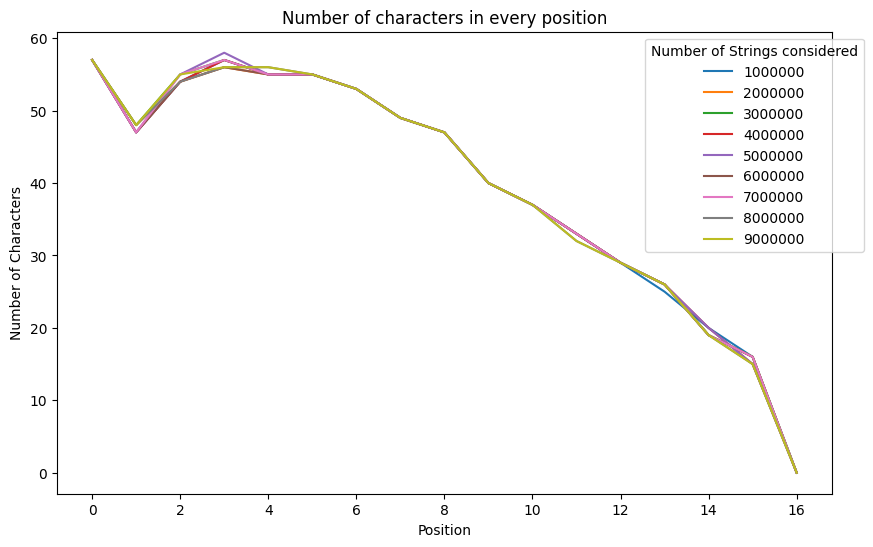

In [85]:
#Ploting df_size
fig,ax = plt.subplots(figsize=(10,6));
ax.set(title="Number of characters in every position",xlabel="Position",ylabel="Number of Characters")
df_size.plot(ax=ax);
ax.legend(bbox_to_anchor=(1.05, 1),title="Number of Strings considered")
plt.savefig("/content/drive/MyDrive/password_analysis/size_plot.png")
plt.show()

In [58]:
df_size

,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000
0,57,57,57,57,57,57,57,57,57
1,47,48,48,47,47,47,47,48,48
2,54,54,55,54,55,54,55,54,55
3,57,56,57,57,58,56,57,56,56
4,55,55,55,55,55,55,55,56,56
5,55,55,55,55,55,55,55,55,55
6,53,53,53,53,53,53,53,53,53
7,49,49,49,49,49,49,49,49,49
8,47,47,47,47,47,47,47,47,47
9,40,40,40,40,40,40,40,40,40


In [59]:
df_char_dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 
 to ﾜ
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       176 non-null    float64
 1   1       164 non-null    float64
 2   2       168 non-null    float64
 3   3       160 non-null    float64
 4   4       156 non-null    float64
 5   5       169 non-null    float64
 6   6       167 non-null    float64
 7   7       166 non-null    float64
 8   8       159 non-null    float64
 9   9       139 non-null    float64
 10  10      122 non-null    float64
 11  11      111 non-null    float64
 12  12      113 non-null    float64
 13  13      107 non-null    float64
 14  14      100 non-null    float64
 15  15      94 non-null     float64
 16  16      75 non-null     float64
dtypes: float64(17)
memory usage: 42.9+ KB


In [61]:
#Splitting dataframe basing on type of characters
df_Num_dist = df_char_dist.iloc[16:26,]
df_Upp_dist = df_char_dist.iloc[33:59,]
df_Low_dist = df_char_dist.iloc[65:91,]

spec1 = df_char_dist.iloc[:16,]
spec2 = df_char_dist.iloc[26:33,]
spec3 = df_char_dist.iloc[59:65,]
spec4 = df_char_dist.iloc[91:,]

#Defing dictionary for special characters i.e everything left
df_Spec_dist = pd.concat([spec1,spec2,spec3,spec4],axis=0)


In [63]:

#Sums for every column
sum_0 = df_Num_dist.sum(axis=0)
sum_1 = df_Upp_dist.sum(axis=0)
sum_2 = df_Low_dist.sum(axis=0)
sum_3 = df_Spec_dist.sum(axis=0)

#Adding sums to a dataframe
Sums = pd.concat([sum_0,sum_1,sum_2,sum_3],axis=1)
Sums.columns = ["Num","Upp","Low","Spec"]
Sums.head(20)



,Num,Upp,Low,Spec
0,1929583.0,711681.0,6288917.0,69819.0
1,1970780.0,389902.0,6583410.0,55908.0
2,1949424.0,392834.0,6601446.0,56296.0
3,2081405.0,374907.0,6469450.0,74238.0
4,2389624.0,370755.0,6146283.0,93338.0
5,2785626.0,342999.0,5755957.0,115418.0
6,3565832.0,297520.0,5022240.0,114408.0
7,4243350.0,246656.0,4368180.0,141814.0
8,3016743.0,156193.0,2914474.0,114297.0
9,2062195.0,96612.0,1887325.0,86567.0


In [64]:
#Saving Sums
Sums.to_csv("/content/drive/MyDrive/password_analysis/Sums.csv")

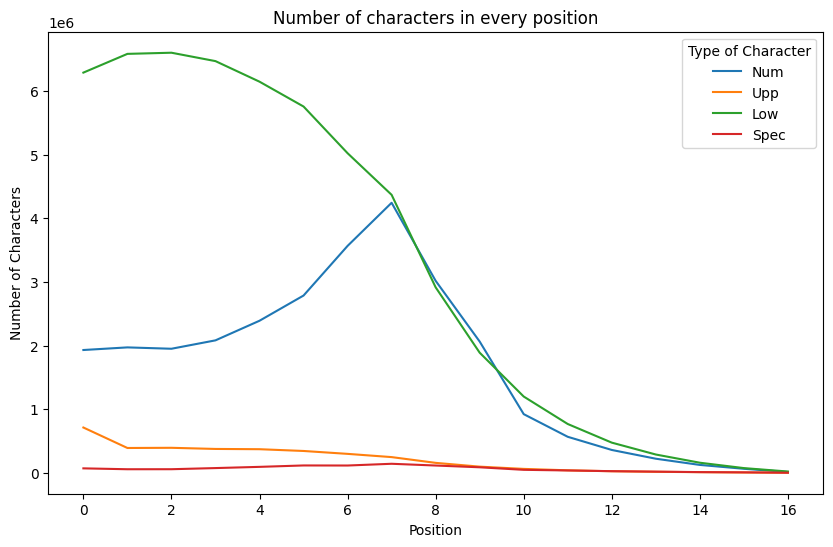

In [67]:
#Plotting Sums
fig,ax = plt.subplots(figsize=(10,6));
ax.set(title="Number of characters in every position",xlabel="Position",ylabel="Number of Characters")
Sums.plot(ax=ax);
ax.legend(bbox_to_anchor=(1, 1),title="Type of Character")
plt.savefig("/content/drive/MyDrive/password_analysis/Sums_plot.png")
plt.show()


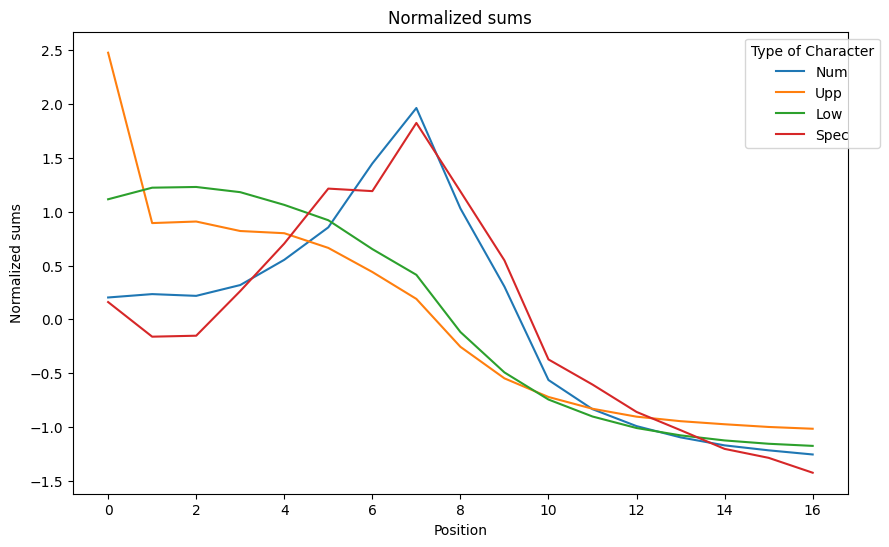

In [69]:
#Normalisation
normalized_df=(Sums-Sums.mean())/Sums.std()
#plotting normalised df
fig,ax = plt.subplots(figsize=(10,6));
ax.set(title="Normalized sums",xlabel="Position",ylabel="Normalized sums")
normalized_df.plot(ax=ax);
ax.legend(bbox_to_anchor=(1.05, 1),title="Type of Character")
plt.savefig("/content/drive/MyDrive/password_analysis/Sums_norm_plot.png")
plt.show()

###How many analysis

####Importing analysed data

In [7]:
#Displaying loaded data
df_anl=pd.read_csv("/content/drive/MyDrive/password_analysis/String_investigation_data.csv",index_col=0)
df_anl.head()

,length,Combinations(1)
entries,,
trandafir,9.0,"{'t': 1, 'r': 2, 'a': 2, 'n': 1, 'd': 1, 'f': ..."
shannon1,8.0,"{'s': 1, 'h': 1, 'a': 1, 'n': 3, 'o': 1, '1': 1}"
myfamily,8.0,"{'m': 2, 'y': 2, 'f': 1, 'a': 1, 'i': 1, 'l': 1}"
monalisa,8.0,"{'m': 1, 'o': 1, 'n': 1, 'a': 2, 'l': 1, 'i': ..."
robinson,8.0,"{'r': 1, 'o': 2, 'b': 1, 'i': 1, 'n': 2, 's': 1}"


#### Creating function to analyse characters

In [5]:
#Counting how many times a character appears in total
def character_counter(comb_size):
  char_dict={}
  for entry in comb_size:
    entry=eval(entry)
    for key in entry:
      if key in char_dict:
        char_dict[key]+= entry[key]
      else:
        char_dict[key]=entry[key]

  char_total=sum(char_dict.values())
  print("Total characters used:",char_total)
  return char_dict,char_total
#Counting how many passwords a character appears in
def character_presence(comb_size):
  char_pass_dict={}
  for entry in comb_size:
    try:
      for key in entry:
          if key in char_pass_dict:
            char_pass_dict[key]+=1
          else:
            char_pass_dict[key]=1
    except Exception as e:
      pass
  char_pass_total=sum(char_pass_dict.values())
  print("Total unique characters used:",char_pass_total)
  return char_pass_dict,char_pass_total


def character_analysis(comb_size):
  #counting total number of characters used
  characters,total_characters=character_counter(comb_size)
  pass_characters,total_unique_characters=character_presence(comb_size)

  #Turing dictionaries into series
  Characters=pd.Series(characters,name="Combi")
  Pass_charcters=pd.Series(pass_characters,name="Unique_Combi")

  #turning series into dataframe
  df_char=pd.concat([Characters,Pass_charcters],axis=1)
  return df_char


#### character combinations

In [8]:
df_1=character_analysis(df_anl["Combinations(1)"])
#Saving data as csv for Tableau analysis
df_1.to_csv("/content/drive/MyDrive/password_analysis/1_character_analysis.csv")

Total characters used: 57594935
Total unique characters used: 372366926


## Explorations

In [14]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#loading data
df_1=pd.read_csv("/content/drive/MyDrive/password_analysis/1_character_analysis.csv",index_col=0)


### 1 character

#### analysis

In [15]:
#sorting by maximum Unique combi
df_1=df_1.sort_values(by="Unique_Combi",ascending=False)
df_1.head()

,Combi,Unique_Combi
',7656.0,93083239.0
,54727.0,87237196.0
:,2763.0,46547803.0
",",NaN,40649848.0
1,2224727.0,38994378.0


In [16]:
#dropping entries with less than 1,000 unique appearances
df1_2000=df_1[df_1["Unique_Combi"]>=2_000]
df1_2000.describe()

,Combi,Unique_Combi
count,8.900000e+01,9.000000e+01
mean,6.467255e+05,4.137093e+06
std,1.046982e+06,1.510595e+07
min,5.190000e+02,2.573000e+03
25%,9.820000e+03,1.117575e+04
50%,3.222300e+04,4.962950e+04
75%,1.010693e+06,1.194105e+06
max,4.851501e+06,9.308324e+07


<ipython-input-17-b7499b5ba859>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_plot.index)


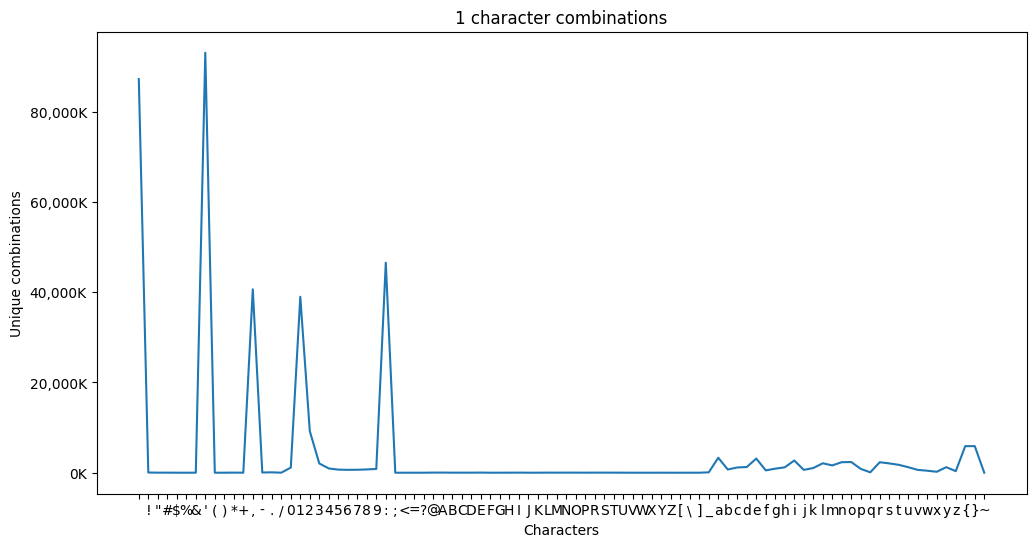

In [17]:
def thou(x, pos):
    'The two args are the value and tick position'
    new_x = x/1000
    return f"{new_x:,.0f}K"

fmt_thou=ticker.FuncFormatter(thou)

df_plot=df1_2000["Unique_Combi"].sort_index()
fig,ax=plt.subplots()
ax=sns.lineplot(data=df_plot)
ax.set_xticklabels(df_plot.index)
ax.set_xlabel("Characters")
ax.set_ylabel("Unique combinations")
ax.yaxis.set_major_formatter(fmt_thou)
ax.figure.set_size_inches(12,6)
ax.set_title("1 character combinations")
plt.savefig("/content/drive/MyDrive/password_analysis/1_character_plot.png")
plt.show()


In [18]:
#adding column for cummulative unique combi
df_1["Cummulative_Combi"]=df_1["Combi"].cumsum()
df_1.head()

,Combi,Unique_Combi,Cummulative_Combi
',7656.0,93083239.0,7656.0
,54727.0,87237196.0,62383.0
:,2763.0,46547803.0,65146.0
",",NaN,40649848.0,NaN
1,2224727.0,38994378.0,2289873.0


In [19]:
#Finding 80% of Combinations used
total= df_1["Cummulative_Combi"].iloc[-1]
cutoff=total*0.99
print(cutoff)
#cutting off df1 at cutoff point
df1_99=df_1[df_1["Cummulative_Combi"]<=57_000_000]
df1_99.describe()

57018985.65


,Combi,Unique_Combi,Cummulative_Combi
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.212594e+06,7.046414e+06,3.722024e+07
std,1.184760e+06,1.970612e+07,1.962548e+07
min,6.200000e+02,3.136100e+04,7.656000e+03
25%,1.899445e+05,6.329370e+05,2.401519e+07
50%,8.760840e+05,1.142678e+06,4.416849e+07
75%,1.597508e+06,2.332889e+06,5.439096e+07
max,4.851501e+06,9.308324e+07,5.699194e+07


#### assigning criticality to passwords

In [20]:
total= df_1["Cummulative_Combi"].iloc[-1]
cutoff=total*0.99
print(cutoff)

57018985.65


In [21]:

for value in df_1["Cummulative_Combi"]:
  index=df_1.index[df_1["Cummulative_Combi"]==value]
  #grouping characters into critical and non-critical
  if value <= 57_000_000:
    df_1.loc[index,"Critical"]=False
  else:
    df_1.loc[index,"Critical"]=True


In [24]:
df_1['Critical'].value_counts()

Critical
True     520
False     47
Name: count, dtype: int64

In [22]:
df_1.head()

,Combi,Unique_Combi,Cummulative_Combi,Critical
',7656.0,93083239.0,7656.0,False
,54727.0,87237196.0,62383.0,False
:,2763.0,46547803.0,65146.0,False
",",NaN,40649848.0,NaN,NaN
1,2224727.0,38994378.0,2289873.0,False


In [23]:
df_1.dropna(inplace=True)

In [25]:
df1_anl=pd.read_csv("/content/drive/MyDrive/password_analysis/String_investigation_data.csv",usecols=[0,1,2])
df1_anl.head()

,entries,length,Combinations(1)
0,trandafir,9.0,"{'t': 1, 'r': 2, 'a': 2, 'n': 1, 'd': 1, 'f': ..."
1,shannon1,8.0,"{'s': 1, 'h': 1, 'a': 1, 'n': 3, 'o': 1, '1': 1}"
2,myfamily,8.0,"{'m': 2, 'y': 2, 'f': 1, 'a': 1, 'i': 1, 'l': 1}"
3,monalisa,8.0,"{'m': 1, 'o': 1, 'n': 1, 'a': 2, 'l': 1, 'i': ..."
4,robinson,8.0,"{'r': 1, 'o': 2, 'b': 1, 'i': 1, 'n': 2, 's': 1}"


In [26]:
df1_anl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5895387 entries, 0 to 5895386
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   entries          object 
 1   length           float64
 2   Combinations(1)  object 
dtypes: float64(1), object(2)
memory usage: 134.9+ MB


In [27]:
#Checking if an entry has a critical character
crit_ent={}
crit_cat={}
df1_crit=df1_anl.select_dtypes(include="object")
df1_crit.set_index("entries",inplace=True)
series_crit=df1_crit["Combinations(1)"]
series_crit.head()

for entry,combi in series_crit.items():
  combi=eval(combi)
  #print(combi)
  criticality=0
  for key,value in combi.items():
    try:
      if df_1.loc[key,"Critical"]==True:
        criticality += value

      crit_ent[entry]=criticality
      if criticality>0:
        crit_cat[entry]=True
      else:
        crit_cat[entry]=False
    except Exception as e:
      pass




In [28]:
#converting crit dictionary to series
Criticality=pd.Series(crit_ent,name="Criticality")
Crit_cat=pd.Series(crit_cat,name="Critical")
df1_anl.set_index("entries",inplace=True)
df1_anl["Criticality"]=Criticality
df1_anl["Critical"]=Crit_cat

In [29]:
df1_anl["Critical"].value_counts()

Critical
False    5629317
True      266070
Name: count, dtype: int64

In [30]:
#Dropping combinations column
df1_anl.drop(columns=["Combinations(1)"],inplace=True)
df1_anl.head()

,length,Criticality,Critical
entries,,,
trandafir,9.0,0,False
shannon1,8.0,0,False
myfamily,8.0,0,False
monalisa,8.0,0,False
robinson,8.0,0,False


In [31]:
df1_anl.to_csv("/content/drive/MyDrive/password_analysis/character_analysis.csv")

In [32]:
df1_anl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5895387 entries, trandafir to cole010886
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   length       float64
 1   Criticality  int64  
 2   Critical     bool   
dtypes: bool(1), float64(1), int64(1)
memory usage: 140.6+ MB
